# Quinta lezione di laboratorio

## Prima funzione d'onda

La prima funzione d'onda presa in considerazione è
$$ \Psi_1 = \frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} = \frac{1}{\sqrt{\pi}} e^{-r}$$
in unità del raggio di bohr $a_0$. Con lo scopo di calcolare $<r>$ per una particella che si trovi in questo stato, è necessario campionare la densità di probabilità
$$P_1=(\Psi_1)^2=\frac{1}{\pi} e^{-2r}$$

Questo è stato fatto con l'algoritmo di Metropolis utilizzando prima una densità di probabilità di transizione
$$T_{\text{unif}}(\vec{x}_n | \vec{x}_{n-1}) = \frac{1}{L_1^3}$$
per
$$x_{(n-1)j}-\frac{L_1}{2}<x_{nj}<x_{(n-1)j}+\frac{L_1}{2}$$
dove $j$ indica la j-esima componente del vettore posizione in coordinate cartesiane, e $T_{\text{unif}} (\vec{x}_n | \vec{x}_{n-1}) = 0$ al di fuori del cubo sopra descritto di lato $L_1$.
È stato scelto $L_1=2.5a_0$ in modo da ottenere un'accettanza dell'algoritmo prossima al $50\%$.

È stato poi fatto anche utilizzando una densità di probabilità di transizione
$$T_{\text{Gauss}}(x_{nj} | x_{(n-1)j}) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x_{nj}-x_{(n-1)j})^2}{2\sigma^2}}$$
È stata scelta $\sigma = 0.75a_0$ in modo da ottenere un'accettanza prossima al $50\%$.

È stato scelto il punto di partenza lungo l'asse $x$ (il sistema è invariante sotto rotazioni quindi è rilevante solo la distanza dall'origine del punto di partenza).
Per evitare dei trend negli spostamenti e una maggiore correlazione tra le misure (come verrà poi discusso) è stata scelta come posizione iniziale per il campionamente una posizione di alta probabilità, nel caso del ground state $0.75a_0$.
Sono state fatte $10^6$ valutazioni della funzione, divise in $100$ blocchi da $10^4$ misure.

Di seguito è riportata la distribuzione dei punti estratti (sono state riportate soltanto $1000$ misure a titolo di esempio) per entrambe le densità di probabilità di transizione sopra descritte. Non sono visibili differenze tra le due distribuzioni. Ciò implica che il campionamento è efficace con entrambe le distribuzioni.

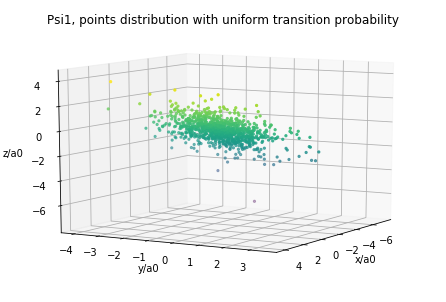

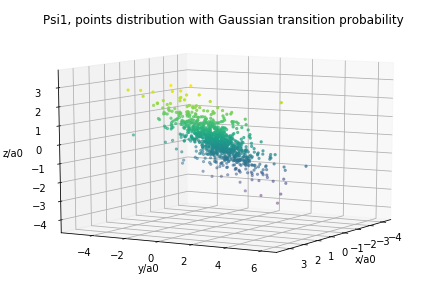

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D


X, Y, Z=np.loadtxt("coordinates_f1_unif.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x/a0')
ax.set_ylabel('y/a0')
ax.set_zlabel('z/a0')
ax.set_title('Psi1, points distribution with uniform transition probability')
ax.view_init(10, 30)

X, Y, Z=np.loadtxt("coordinates_f1_Gauss.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x/a0')
ax.set_ylabel('y/a0')
ax.set_zlabel('z/a0')
ax.set_title('Psi1, points distribution with Gaussian transition probability')
ax.view_init(10, 30)
plt.show()

Di seguito è riportato l'andamento dei valori medi della posizione in funzione del numero di blocchi presi in considerazione per entrambe le densità di probabilità di transizione sopra descritte.

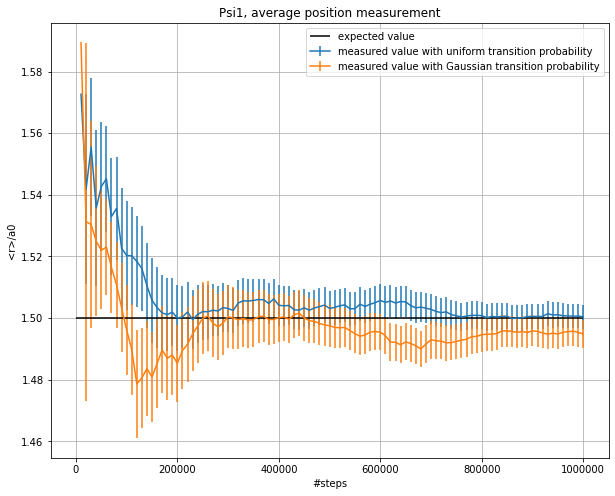

In [17]:
plt.figure(figsize=(10, 8))
x1, f1, error1 = np.loadtxt("prog_r_f1_unif.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
x2, f2, error2 = np.loadtxt("prog_r_f1_Gauss.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x1,f1,yerr=error1, label='measured value with uniform transition probability')
plt.errorbar(x2,f2,yerr=error2, label='measured value with Gaussian transition probability')
plt.hlines(1.5, 0., 1000000, label='expected value')
plt.xlabel('#steps')
plt.ylabel('<r>/a0')
plt.title('Psi1, average position measurement')
plt.grid(True)
plt.legend()

plt.show()

Di seguito viene riportato il valor medio dell'accettazione dell'algoritmo in ogni blocco preso in considerazione.
Questo viene fatto per entrambe le densità di probabilità di transizione sopra descritte.

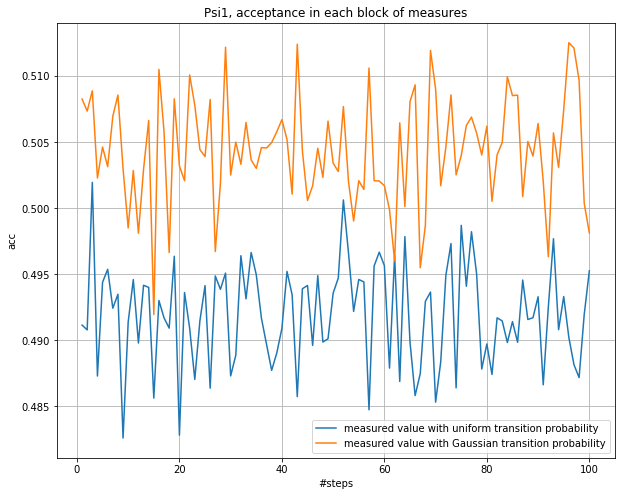

In [26]:
plt.figure(figsize=(10, 8))

x1, f1 = np.loadtxt("acc_f1_unif.txt", usecols=(0,1), delimiter=' ', unpack='true')
x2, f2 = np.loadtxt("acc_f1_Gauss.txt", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(x1,f1, label='measured value with uniform transition probability')
plt.plot(x2,f2, label='measured value with Gaussian transition probability')
plt.xlabel('#steps')
plt.ylabel('acc')
plt.title('Psi1, acceptance in each block of measures')
plt.grid(True)
plt.legend()

plt.show()

# Seconda funzione d'onda

La seconda funzione d'onda presa in considerazione è
$$ \Psi_2 = \frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta) = \frac{1}{8} \sqrt{\frac{2}{\pi}}r e^{-r/2} \cos\theta$$
in unità del raggio di bohr $a_0$. Con lo scopo di calcolare $<r>$ per una particella che si trovi in questo stato, è necessario campionare la densità di probabilità
$$P_2=(\Psi_2)^2=\frac{r^2}{32\pi} e^{-r} \cos^2 \theta$$

Questo è stato fatto con l'algoritmo di Metropolis utilizzando prima una densità di probabilità di transizione
$$T_{\text{unif}}(\vec{x}_n | \vec{x}_{n-1}) = \frac{1}{L_2^3}$$
per
$$x_{(n-1)j}-\frac{L_2}{2}<x_{nj}<x_{(n-1)j}+\frac{L_2}{2}$$
dove $j$ indica la j-esima componente del vettore posizione in coordinate cartesiane, e $T_{\text{unif}} (\vec{x}_n | \vec{x}_{n-1}) = 0$ al di fuori del cubo sopra descritto di lato $L_2$.
È stato scelto $L_2=6a_0$ in modo da ottenere un'accettanza dell'algoritmo prossima al $50\%$.

È stato poi fatto anche utilizzando una densità di probabilità di transizione
$$T_{\text{Gauss}}(x_{nj} | x_{(n-1)j}) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x_{nj}-x_{(n-1)j})^2}{2\sigma^2}}$$
È stata scelta $\sigma = 1.85a_0$ in modo da ottenere un'accettanza prossima al $50\%$.

Il punto di partenza l'ho scelto lungo l'asse x (il sistema è invariante sotto rotazioni quindi è rilevante solo la distanza dall'origine del punto di partenza).
Per evitare dei trend negli spostamenti e una maggiore correlazione tra le misure (come verrà poi discusso) è stata scelta come posizione iniziale per il campionamente una posizione di alta probabilità, nel caso del ground state $3.5a_0$.

Di seguito è riportata la distribuzione dei punti estratti (sono state riportate soltanto $1000$ misure a titolo di esempio) per entrambe le densità di probabilità di transizione sopra descritte. Non sono visibili differenze tra le due distribuzioni. Ciò implica che il campionamento è efficace con entrambe le distribuzioni.

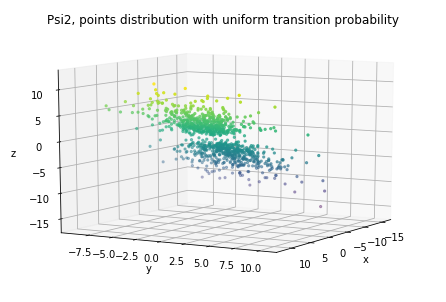

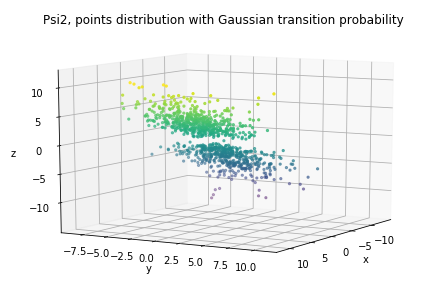

In [20]:
X, Y, Z=np.loadtxt("coordinates_f2_unif.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Psi2, points distribution with uniform transition probability')
ax.view_init(10, 30)

X, Y, Z=np.loadtxt("coordinates_f2_Gauss.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Psi2, points distribution with Gaussian transition probability')
ax.view_init(10, 30)
plt.show()

Di seguito è riportato l'andamento dei valori medi della posizione in funzione del numero di blocchi presi in considerazione per entrambe le densità di probabilità di transizione sopra descritte.

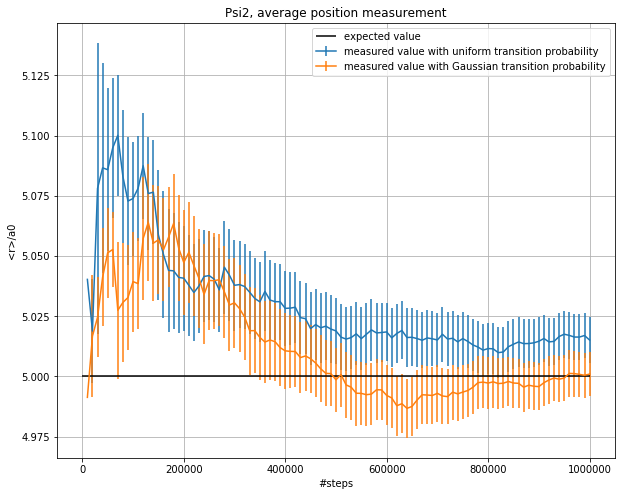

In [25]:
plt.figure(figsize=(10,8))

x1, f1, error1 = np.loadtxt("prog_r_f2_unif.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
x2, f2, error2 = np.loadtxt("prog_r_f2_Gauss.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x1,f1,yerr=error1, label='measured value with uniform transition probability')
plt.errorbar(x2,f2,yerr=error2, label='measured value with Gaussian transition probability')
plt.hlines(5., 0., 1000000, label='expected value')
plt.xlabel('#steps')
plt.ylabel('<r>/a0')
plt.title('Psi2, average position measurement')
plt.grid(True)
plt.legend()

plt.show()

Di seguito viene riportato il valor medio dell'accettazione dell'algoritmo in ogni blocco preso in considerazione.
Questo viene fatto per entrambe le densità di probabilità di transizione sopra descritte.

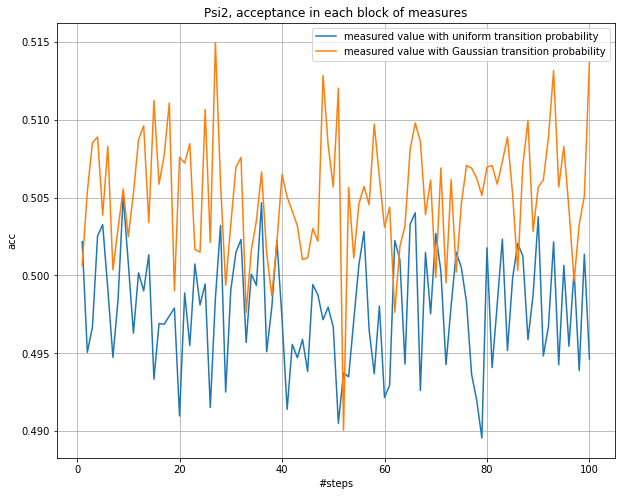

In [27]:
plt.figure(figsize=(10, 8))
x1, f1 = np.loadtxt("acc_f2_unif.txt", usecols=(0,1), delimiter=' ', unpack='true')
x2, f2 = np.loadtxt("acc_f2_Gauss.txt", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(x1,f1, label='measured value with uniform transition probability')
plt.plot(x2,f2, label='measured value with Gaussian transition probability')
plt.xlabel('#steps')
plt.ylabel('acc')
plt.title('Psi2, acceptance in each block of measures')
plt.grid(True)
plt.legend()

plt.show()

Dai dati sopra riportati emerge in modo evidente come le due densità di probabilità di transizione siano del tutto equivalenti. Di conseguenza i valori medi della posizione per entrambe le funzioni d'onda sono compatibili con i valori attesi.

Analizziamo ora la situazione in cui il random walker parte molto lontano dall'origine.
Consideriamo la simulazione in cui il random walker estrae il potenziale punto successivo uniformemente nel cubo unicamente per una questione di semplicità della trattazione successiva.
Se la posizione di partenza è molto lontana dall'origine, ci troviamo, per entrambe le funzioni d'onda, in una zona in cui la distribuzione di probabilità è monotona decrescente in r.
A causa della grande lontananza, la superificie sferica che divide il cubo di possibili punti successivi è approssimativamente un piano passante per il centro del cubo, e i punti contenuti nel cubo vengono con buona approssimazione divisi in due parti: metà dei possibili punti successivi sono più vicini all'origine rispetto al centro del cubo (punto precedente), e metà dei possibili punti successivi sono più lontani dall'origine. La distribuzione di probabilità valutata nella prima metà dei punti (quelli più vicini all'origine) è quindi maggiore della distribuzione di probabilità valutata nel punto precedente (a causa della monotonia della distribuzione), questo implica che $\alpha$ assumerà il valore di 1 e, se estratti, i punti verrano sicuramente accettati.
La distribuzione di probabilità valutata nella seconda metà dei punti (quelli più lontani dall'origine) è invece minore della distribuzione di probabilità valutata nel punto precedente, questo implica che $\alpha$ assumerà il valore del rapporto delle probabilità $\left(\frac{p(x_{n+1})}{p(x_n)}<1\right)$ e questi punti, se estratti verranno accettati con probabilità $\alpha$.
    Questo causa la persistenza di un valore medio di $\alpha$ superiore al $50%$ e c'è una più forte correlazione tra punti successivi. Si può ottenere $<\alpha> = \frac{1}{2} + <\frac{p(x_{n+1})}{p(x_n)}>$ con $x_{n+1}$ appartenente al cubo centrato in $x_n$, ma più lontano dall'origine di $x_n$, da cui quindi $<\frac{p(x_{n+1})}{p(x_n)}> = 2<\alpha>-1$. Se chiamiamo $\epsilon$ il valor medio della differenza tra la distanza dall'origine dei punti del cubo (tutti equiprobabili) e la distanza dall'origine del centro del cubo (che quindi a grandi distanze assume il valore di $\epsilon=\frac{L}{4}$), la distanza media tra due punti successivi della sequenza di estrazioni è $<\Delta x > = -\frac{\epsilon}{2} +\frac{\epsilon}{2} <\frac{p(x_{n+1})}{p(x_n)}> + 0\cdot\left( 1-<\frac{p(x_{n+1})}{p(x_n)}> \right) =-\epsilon \left(1-<\alpha> \right)<0$.
Per trovare conferma di quanto detto, si è simulato un random walk partendo da una distanza di $75 a_0$ con un'estrazione identica a quella della prima simulazione ($L=2.5 a_0$).
$<\Delta x>$ rappresenta quindi il coefficiente angolare nella figura sottostante.
Si è data una stima di $<\alpha>$  calcolandone il valor medio per i primi 200 punti della successione. Si è quindi ottenuta la retta che rappresenta l'avvicinamento medio durante la successione.
La situazione è concettualmente analoga anche nel caso in cui l'estrazione avviene con distribuzione gaussiana. A titolo di chiarificativo vengono riportati alcuni grafici relativi alla prima funzione d'onda (la situazione è analoga anche nel caso della seconda funzione d'onda).

Nella prima figura viene riportato il confronto tra l'evoluzione della distanza dall'origine nel caso in cui si parta da $75a_0$ e nel caso in cui si parta da $0.75a_0$. Questo confronto viene effettuato tra le prime $1000$ misure effettuate. Nella seconda figura viene riportato il medesimo confronto, solo per le prime $400$ misure, zona in cui è possibile vedere il trend di cui si è parlato sopra. Viene inoltre effettuato il fit sopra menzionato. Nella terza figura vengono riportati i valori dell'accettanza per le prime $1000$ misure nei due casi. Viene inoltre calcolato il valor medio dell'accettanza nelle prime $250$ misure effettuate partendo da $75a_0$ e il valor medio dell'accettanza sulle prima $1000$ misure nel secondo caso.

il valor medio di alpha per le prime 200 misure partendo da lontano
0.6989231835000002
il valor medio di alpha per le prime 1000 misure partendo da vicino
0.4921472537999998


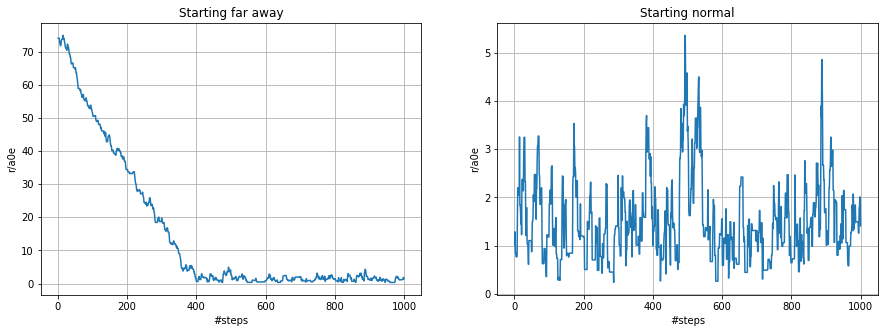

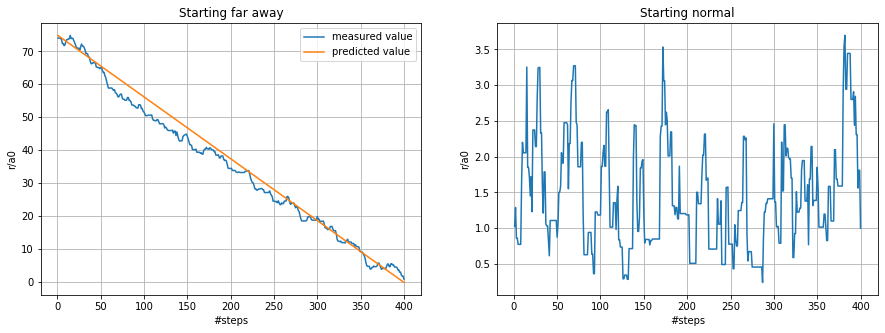

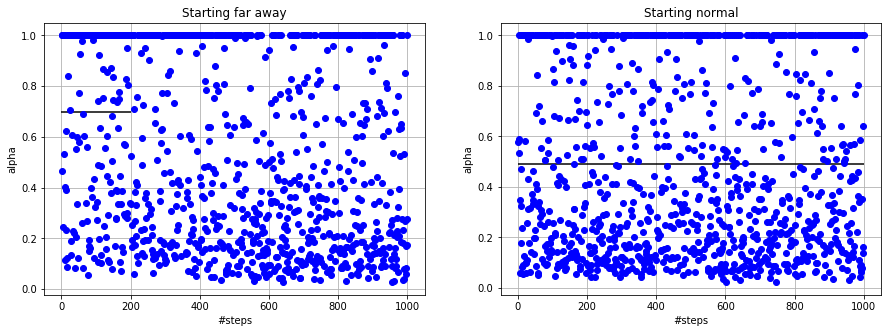

In [11]:
import matplotlib.ticker as ticker

L=2.5
q=75.
x_max=200

x1_far, r1_far, alpha_far = np.loadtxt("starting_far_away.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
ave_alpha_far=0.
x1_norm, r1_norm, alpha_norm = np.loadtxt("starting_normal.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
ave_alpha_norm=0.

for i in range(x_max):
    ave_alpha_far+=alpha_far[i]
ave_alpha_far=ave_alpha_far/x_max

for i in range(x1_norm.size):
    ave_alpha_norm+=alpha_norm[i]
ave_alpha_norm=ave_alpha_norm/x1_norm.size

m=-L/4*(1-ave_alpha_far)

fig1=plt.figure(figsize=(15, 5))
ax=fig1.add_subplot(121)
ax.plot(x1_far,r1_far)
ax.set_title('Starting far away')
ax.set_xlabel('#steps')
ax.set_ylabel('r/a0e')
ax.grid(True)

ax = fig1.add_subplot(122)
ax.plot(x1_norm,r1_norm)
ax.set_title('Starting normal')
ax.set_xlabel('#steps')
ax.set_ylabel('r/a0e')
ax.grid(True)

x2_far=np.zeros(400)
x2_norm=np.zeros(400)
r2_far=np.zeros(400)
r2_norm=np.zeros(400)
for i in range(400):
    x2_far[i]=x1_far[i]
    x2_norm[i]=x1_norm[i]
    r2_far[i]=r1_far[i]
    r2_norm[i]=r1_norm[i]

fig2=plt.figure(figsize=(15, 5))
ax=fig2.add_subplot(121)
ax.plot(x2_far, r2_far, label='measured value')
ax.plot(x2_far, m*x2_far+q, label='predicted value')
ax.set_xlabel('#steps')
ax.set_ylabel('r/a0')
ax.grid(True)
plt.legend()
plt.title('Starting far away')

ax=fig2.add_subplot(122)
ax.plot(x2_norm, r2_norm)
ax.set_xlabel('#steps')
ax.set_ylabel('r/a0')
ax.grid(True)
plt.title('Starting normal')

print('il valor medio di alpha per le prime 200 misure partendo da lontano')
print(ave_alpha_far)
print('il valor medio di alpha per le prime 1000 misure partendo da vicino')
print(ave_alpha_norm)

fig3=plt.figure(figsize=(15, 5))
ax=fig3.add_subplot(121)
ax.plot(x1_far, alpha_far, 'bo')
ax.hlines(ave_alpha_far, 0., x_max)
ax.set_xlabel('#steps')
ax.set_ylabel('alpha')
ax.grid(True)
plt.title('Starting far away')

ax=fig3.add_subplot(122)
ax.plot(x1_norm, alpha_norm, 'bo')
ax.hlines(ave_alpha_norm, 0., x1_norm.size)
ax.set_xlabel('#steps')
ax.set_ylabel('alpha')
ax.grid(True)
plt.title('Starting normal')

plt.show()